### Dataframe de ejemplo para el areaplot y snapshot

In [1]:
import numpy as np
import pandas as pd

# ==============================================
# 1. DATOS 
# ==============================================
n = 12
fechas = [f"2023-{i+1:02d}" for i in range(n)]
comisiones = np.random.rand(n) * 0.4
fiscalias = np.random.rand(n) * 0.4
portal = np.random.rand(n) * 0.2

# Normalizar
total = comisiones + fiscalias + portal
comisiones, fiscalias, portal = comisiones/total, fiscalias/total, portal/total


# Crear el DataFrame
data = pd.DataFrame({
    'fechas': fechas,
    'comisiones': comisiones,
    'fiscalias': fiscalias,
    'portal': portal
})

data

,fechas,comisiones,fiscalias,portal
0,2023-01,0.069345,0.627598,0.303057
1,2023-02,0.369022,0.435428,0.195550
2,2023-03,0.367526,0.500054,0.132421
3,2023-04,0.259814,0.712029,0.028158
4,2023-05,0.325207,0.289563,0.385231
5,2023-06,0.637984,0.163397,0.198619
6,2023-07,0.311212,0.618915,0.069874
7,2023-08,0.345668,0.380011,0.274320
8,2023-09,0.297781,0.462680,0.239539
9,2023-10,0.345992,0.456446,0.197562


### **Código a copiar para el areaplot y snapshot:**

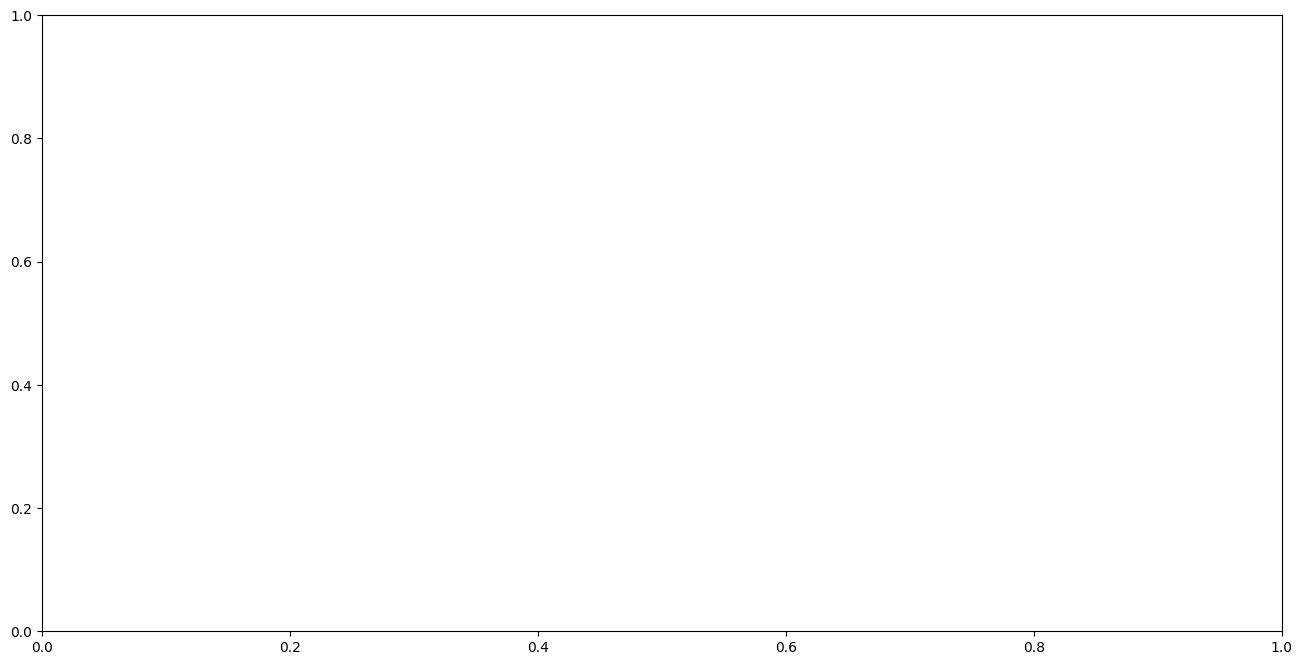

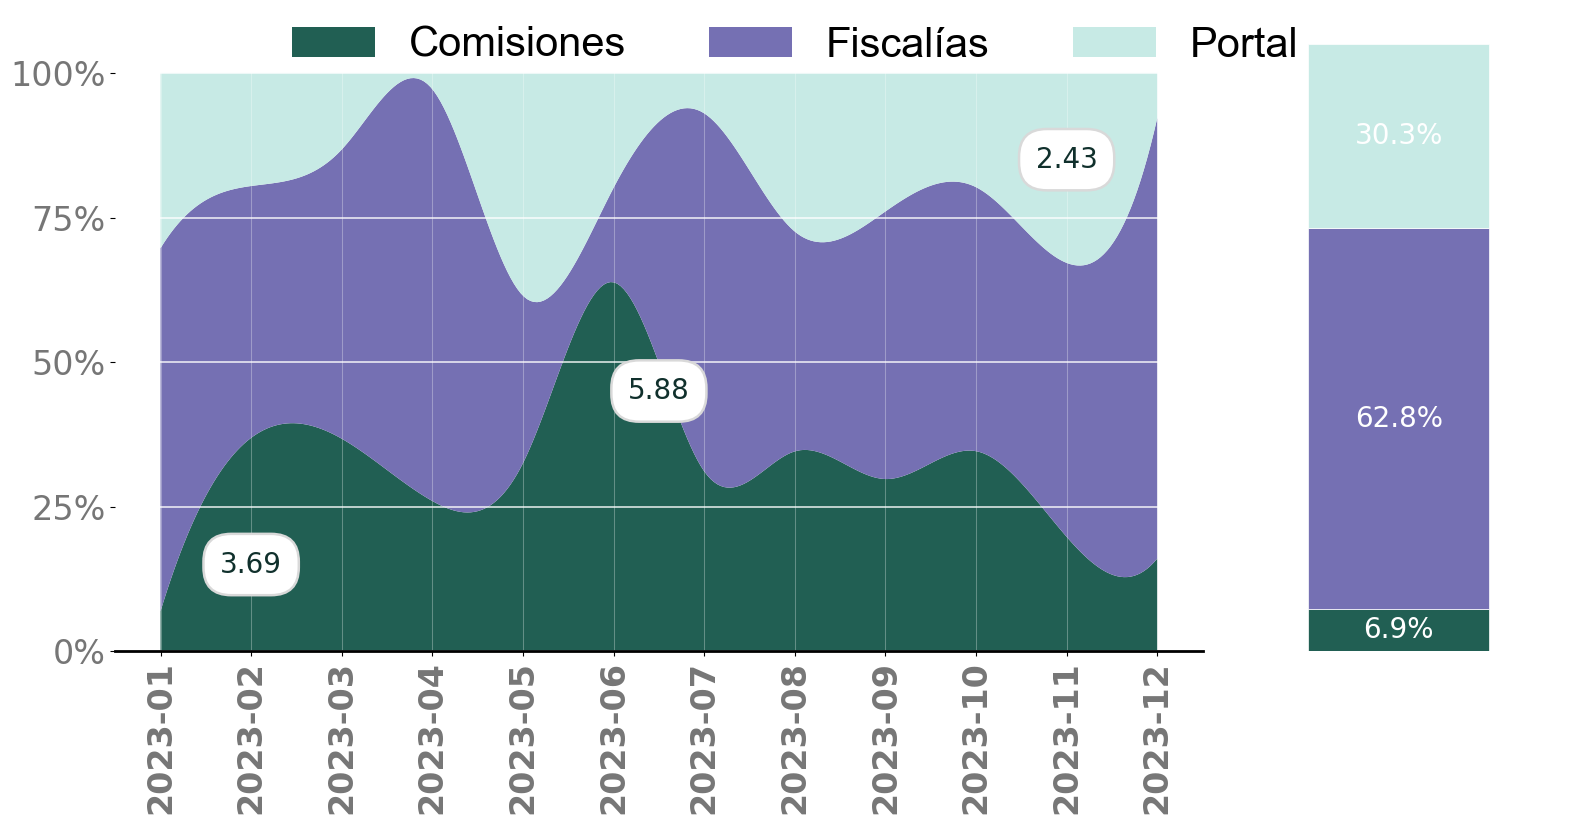

In [3]:
from pathlib import Path
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import font_manager
from scipy.interpolate import make_interp_spline

# VARIABLES A CAMBIAR:
dataframe_a_graficar = data

# Configurar las fuentes SVG como texto editable
plt.rcParams['svg.fonttype'] = 'none'

# Ruta relativa para las fuentes
font_dirs = [Path("../0_fonts/")]
font_files = font_manager.findSystemFonts(fontpaths=font_dirs)

for font_file in font_files:
    font_manager.fontManager.addfont(font_file)

# Crear una instancia de FontProperties para Arial
arial_font = font_manager.FontProperties(fname=str(font_files[0]))

def snapshot(data):
    """
    Genera un gráfico de área apilada con los datos proporcionados en un DataFrame.

    Parámetros:
    - data: DataFrame que contiene las columnas 'fechas', 'comisiones', 'fiscalias' y 'portal'.
    """
    font_config = {
        'family': 'Arial',  # Cambiar a Arial
        'titulo': {'size': 36, 'weight': 'medium', 'color': '#000000'},
        'eje_y': {'size': 24, 'weight': 'medium', 'color': '#000000'},
        'eje_x': {'size': 24, 'weight': 'medium', 'color': '#000000'},
        'etiquetas_eje_y': {'size': 24, 'weight': 'medium', 'color': '#767676'},
        'etiquetas_eje_x': {'size': 24, 'weight': 'semibold', 'color': '#767676'},
        'capsula_valor': {'size': 20, 'weight': 'medium', 'color': '#10302C'},
        'capsula_max': {'size': 12, 'weight': 'medium', 'color': 'white'},
        'porcentaje': {'size': 20, 'weight': 'medium', 'color': 'white'},
        'leyenda': {'size': 30, 'weight': 'medium', 'color': '#767676'}  # Nueva categoría para la leyenda
    }

    # Extraer columnas del DataFrame
    fechas = data['fechas']
    comisiones = data['comisiones']
    fiscalias = data['fiscalias']
    portal = data['portal']
    
    # Crear figura
    fig, ax = plt.subplots(figsize=(16, 8))
    n = len(fechas)
    x = np.arange(n) + 0.5  # Desfase visual

    fig_sub = plt.figure(figsize=(16, 8))
    gs = fig.add_gridspec(1, 2, width_ratios=[3, 1], height_ratios=[1])

    # ==============================================
    # 2.1. PRIMER SUBPLOT - GRÁFICO DE ÁREAS
    # ==============================================
    ax1 = fig_sub.add_subplot(gs[0])  # Usa este, no crees otra figura

    # Suavizar las curvas visualmente
    x_suave = np.linspace(x.min(), x.max(), 300)  # Más puntos para suavizar
    comisiones_suave = make_interp_spline(x, comisiones)(x_suave)
    fiscalias_suave = make_interp_spline(x, fiscalias)(x_suave)
    portal_suave = make_interp_spline(x, portal)(x_suave)


    x = np.arange(n) + 0.5
    ax1.stackplot(x_suave, comisiones_suave, fiscalias_suave, portal_suave, labels=[
        'Comisiones', 'Fiscalías y Procuradurías', 'Portal'],
        colors=['#215F53', '#7570B3', '#C7EAE5'])

    # Eje X
    ax1.set_xticks(x)
    ax1.set_xticklabels(fechas, rotation=90, fontsize=font_config['etiquetas_eje_x']['size'], 
                         fontweight=font_config['etiquetas_eje_x']['weight'], 
                         color=font_config['etiquetas_eje_x']['color'])
    ax1.set_xlim(x[0] - 0.5, x[-1] + 0.5)

    # Eje Y
    ax1.set_yticks(np.linspace(0, 1, 5))
    ax1.set_yticklabels(['0%', '25%', '50%', '75%', '100%'], fontsize=font_config['etiquetas_eje_y']['size'], 
                         fontweight=font_config['etiquetas_eje_y']['weight'], 
                         color=font_config['etiquetas_eje_y']['color'])

    # Estética
    ax1.spines['top'].set_visible(False)
    ax1.spines['right'].set_visible(False)
    ax1.spines['left'].set_visible(False)
    ax1.spines['bottom'].set_linewidth(2)
    ax1.grid(axis='y', linestyle='-', color='white', alpha=0.8, linewidth=1.25)
    ax1.grid(axis='x', linestyle='-', color='white', alpha=0.3, linewidth=0.75)

    # Etiquetas de totales
    x_coords = [1.5, 6, 10.5]
    y_coords = [0.15, 0.45, 0.85]
    totales = [sum(comisiones), sum(fiscalias), sum(portal)]
    colores_borde = ['#D9D9D9'] * 3

    for x_c, y_c, total, color_borde in zip(x_coords, y_coords, totales, colores_borde):
        ax1.text(x_c, y_c, f"{total:.2f}",
                 ha='center', va='center',
                 fontsize=font_config['capsula_valor']['size'], 
                 color=font_config['capsula_valor']['color'],
                 bbox=dict(boxstyle="round,pad=0.6,rounding_size=1",
                           facecolor='white', edgecolor=color_borde, linewidth=1.8))

    # ==============================================
    # 2.2. SEGUNDO SUBPLOT - Snapshot
    # ==============================================
    ax2 = fig_sub.add_subplot(gs[1])

    # Datos simulados (sept. 2006)
    totales = np.array([sum(comisiones[:1]), sum(fiscalias[:1]), sum(portal[:1])])
    totales_norm = totales / totales.sum()

    colores = ['#215F53', '#7570B3', '#C7EAE5']
    bar_width = 0.5

    # Dibujar barra apilada
    bottom = 0
    for i, (valor, color) in enumerate(zip(totales_norm, colores)):
        ax2.bar(0, valor, width=bar_width, bottom=bottom,
                color=color, edgecolor='white', linewidth=0.5)
    
        # Etiqueta de porcentaje en el centro
        ax2.text(0, bottom + valor/2, f"{valor*100:.1f}%",
                 ha='center', va='center', color=font_config['porcentaje']['color'], 
                 fontweight=font_config['porcentaje']['weight'], 
                 fontsize=font_config['porcentaje']['size'])
        bottom += valor

    # Estética limpia
    ax2.set_xlim(-0.5, 0.5)
    ax2.set_ylim(0, 1)
    ax2.set_xticks([])
    ax2.set_yticks([])

    for spine in ax2.spines.values():
        spine.set_visible(False)
    
    # Eliminar etiquetas de fecha del segundo subplot
    ax2.tick_params(bottom=False, labelbottom=False)

    # Evitar espacio excesivo
    plt.subplots_adjust(wspace=0.05, hspace=0.05)

    # Crear una instancia de FontProperties para la leyenda
    leyenda_font = font_manager.FontProperties(
        family=font_config['family'],
        size=font_config['leyenda']['size'],
        weight=font_config['leyenda']['weight']
    )

    # Leyenda común
    fig_sub.legend(
        ['Comisiones', 'Fiscalías', 'Portal'],
        loc='upper center',
        ncol=3,
        frameon=False,
        fontsize=font_config['leyenda']['size'],
        prop=leyenda_font,  # Usar la instancia de FontProperties
        bbox_to_anchor=(0.5, 1.05)  # Ajustar la posición vertical (1.05 es un poco más arriba)
    )    

    plt.tight_layout()

    # Guardar la gráfica como archivo SVG
    plt.savefig("snapshot.svg", format="svg", bbox_inches='tight')
    plt.show()

snapshot(dataframe_a_graficar)